<a href="https://colab.research.google.com/github/kodai-sasaki/rsvm-colab/blob/main/RSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computation of the RSVM

## Setup

First, you should import the fundamental scientific computing and drawing libraries.

In [ ]:
import numpy as np
from scipy.special import logsumexp
import pandas as pd
import matplotlib.pyplot as plt

## Discrete Distribution Model

In this section, we treat random variables as following the discrete distribution such that
\begin{equation}
P(X=a_i) = p_i, i = 1,2,...,n \\
p_i >0, \sum_ip_i=1
\end{equation}

In [ ]:
def mean_descrete(a, p):
  return np.dot(a, p)
def var_descrete(a, p):
  return np.dot(np.array(a) ** 2, p) - mean_descrete(a, p) ** 2

We define the risk-sensitive value calicutatior using an RSVM for a risk aversion $\alpha \in \mathbb{R}$ and a random variable $X$

In [ ]:
def rsvm_descrete(alpha, a, p):
  if np.ndim(a) != 1 or np.ndim(p) != 1 or np.shape(a) != np.shape(p):
    return None
  if alpha == 0:
    return mean_descrete(a, p)
  return - logsumexp(np.log(np.array(p)) - alpha * np.array(a)) / alpha

For example, let $X$ be random variable such that
\begin{equation}
P(X = 10) = 0.02, P(X = 4) = 0.5, P(X = 8) = 0.48
\end{equation}

In [ ]:
a_x = [-10, 4, 8]
p_x = [0.02, 0.5, 0.48]

We culcurate the risk-sensitive value of $X$ with a risk aversion $\alpha = 0.1$.

In [ ]:
rsvm_descrete(0.1, a_x, p_x)

np.float64(5.021904108273835)

Let the random variables Y and Z be as follows
\begin{equation}
P(Y = -1.5) = 0.15, P(Y = 5) = 0.7, P(Y = 11.5) = 0.15\\
P(Z = -0.5) = 0.2, P(Z = 4.5) = 0.7, P(Z = 16) = 0.1
\end{equation}

In [ ]:
a_y = [-1.5, 5, 11.5]
p_y = [0.15, 0.7, 0.15]

a_z = [-0.5, 4.5, 16]
p_z = [0.2, 0.7, 0.1]

In [ ]:
df = pd.DataFrame([
  [mean_descrete(a_x, p_x), var_descrete(a_x, p_x)],
  [mean_descrete(a_y, p_y), var_descrete(a_y, p_y)],
  [mean_descrete(a_z, p_z), var_descrete(a_z, p_z)]
], columns=["Mean", "Variance"], index=["X", "Y", "Z"])
df.T

,X,Y,Z
Mean,5.6400,5.000,4.6500
Variance,8.9104,12.675,18.2025


In [ ]:
risk_aversions = [(i - 10) / 10 for i in range(21)]
df = pd.DataFrame(
  [[float(rsvm_descrete(alpha, a, p)) for a, p in [(a_x, p_x), (a_y, p_y), (a_z, p_z)]] for alpha in risk_aversions],
  columns = ["X", "Y", "Z"],
  index = risk_aversions
)
df

,X,Y,Z
-1.0,7.284930,9.609874,13.697486
-0.9,7.215662,9.406931,13.441822
-0.8,7.134518,9.160410,13.122657
-0.7,7.039213,8.858747,12.713808
-0.6,6.927212,8.489196,12.174240
-0.5,6.795836,8.040937,11.439922
-0.4,6.642330,7.511397,10.419878
-0.3,6.463517,6.913878,9.032026
-0.2,6.253709,6.278148,7.357705
-0.1,5.996766,5.635737,5.785035


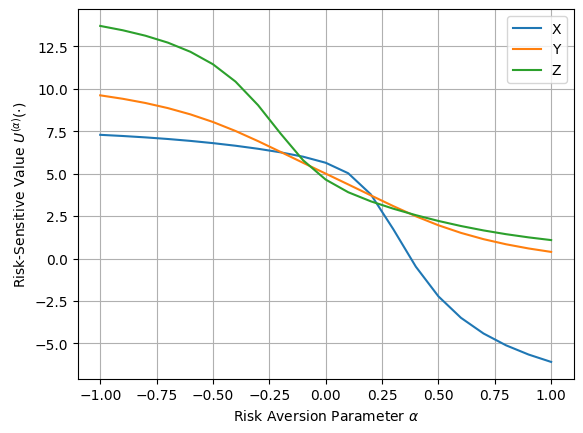

In [ ]:
df.plot()
plt.xlabel("Risk Aversion Parameter $\\alpha$")
plt.ylabel("Risk-Sensitive Value $U^{(\\alpha)}(\\cdot)$")
plt.grid()
plt.legend()
plt.show()